In [18]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt


In [42]:
load_augmented_train_set = True

In [43]:
train_review_path = "./../../data/dataset/reviews/train.pkl"
train_aug_review_path = "./../../data/dataset/reviews/train_aug.pkl"
val_review_path = "./../../data/dataset/reviews/val.pkl"
test_review_path = "./../../data/dataset/reviews/test.pkl"

if load_augmented_train_set:
    train_review_path = train_aug_review_path

train_movie_path = "./../../data/dataset/movies/train.csv"
val_movie_path = "./../../data/dataset/movies/val.csv"
test_movie_path = "./../../data/dataset/movies/test.csv"

def read_movie(path):
    d = pd.read_csv(path)
    return d[['movie_title', 'review_type', 'review_content', 'my_score']]

reviews_raw_data = {"train": None, "val": None, "test": None}
with open(train_review_path, 'rb') as f:
    reviews_raw_data['train'] = pickle.load(f)
with open(val_review_path, 'rb') as f:
    reviews_raw_data['val'] = pickle.load(f)
with open(test_review_path, 'rb') as f:
    reviews_raw_data['test'] = pickle.load(f)

movies_raw_data = {"train": None, "val": None, "test": None}
movies_raw_data['train'] = read_movie(train_movie_path)
movies_raw_data['val'] = read_movie(train_movie_path)
movies_raw_data['test'] = read_movie(train_movie_path)

## Visualization

In [55]:
for i in np.random.randint(0, len(reviews_raw_data['train']['y']), size=10):
    print(f"{reviews_raw_data['train']['x'][i][:35]}... \t[{reviews_raw_data['train']['y'][i]}]")

spent double maybe even four times ... 	[Rotten]
continues painful decline director ... 	[Rotten]
paul greengrass created another gri... 	[Fresh]
moments hitchhiker mildly amused in... 	[Rotten]
excellent storytelling pathos pixar... 	[Rotten]
though latest film plunges deep hea... 	[Rotten]
goofily charming rare age appropria... 	[Fresh]
really dazzles action beats getaway... 	[Fresh]
hardy fascinating watch first scene... 	[Fresh]
awful truth script fundamentally gr... 	[Rotten]


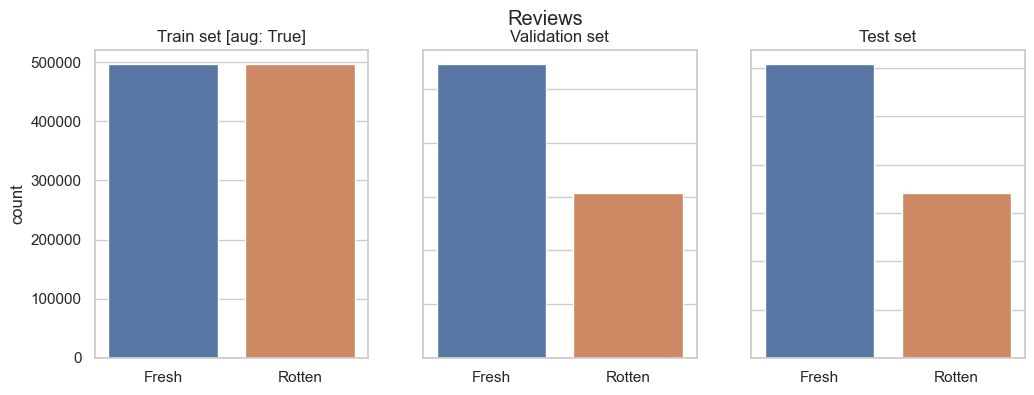

In [45]:
plt.figure(figsize=(12,4))
plt.subplot(131)
g1 = sns.countplot(x=reviews_raw_data['train']['y'])
g1.set(xlabel=None)
plt.title(f"Train set [aug: {load_augmented_train_set}]")
plt.subplot(132)
g2 = sns.countplot(x=reviews_raw_data['val']['y'])
g2.set(yticklabels=[])
g2.set(xlabel=None)
g2.set(ylabel=None)
plt.title("Validation set")
plt.subplot(133)
g3 = sns.countplot(x=reviews_raw_data['test']['y'])
g3.set(yticklabels=[])
g3.set(xlabel=None)
g3.set(ylabel=None)
plt.title("Test set")
plt.suptitle("Reviews")
plt.show()

In [46]:
movies_raw_data['train']

,movie_title,review_type,review_content,my_score
0,Dead Man Running,Rotten,quality cast run round track many times script...,0.440283
1,Dead Man Running,Rotten,budget conscious simplistically plotted often ...,0.440283
2,Dead Man Running,Rotten,dark cumbersome comedy weak unlikely drama ret...,0.440283
3,Dead Man Running,Rotten,dead man running feels like something cobbled ...,0.440283
4,Dead Man Running,Rotten,shift serious dvd units bad could,0.440283
...,...,...,...,...
749006,Fun With Dick and Jane,Rotten,consider signed confession remake rape produce...,0.445946
749007,Fun With Dick and Jane,Rotten,fun dick jane extended enron joke used give ji...,0.445946
749008,Fun With Dick and Jane,Fresh,one many work right try movie good laugh,0.445946
749009,Fun With Dick and Jane,Rotten,gummy remake george segal jane fonda 1977 come...,0.445946


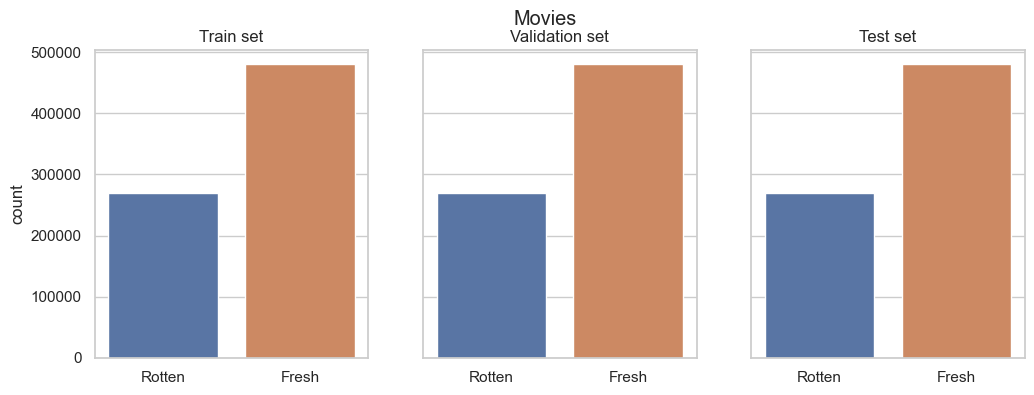

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(131)
g1 = sns.countplot(x=movies_raw_data['train']['review_type'])
g1.set(xlabel=None)
plt.title("Train set")
plt.subplot(132)
g2 = sns.countplot(x=movies_raw_data['val']['review_type'])
g2.set(yticklabels=[])
g2.set(xlabel=None)
g2.set(ylabel=None)
plt.title("Validation set")
plt.subplot(133)
g3 = sns.countplot(x=movies_raw_data['test']['review_type'])
g3.set(yticklabels=[])
g3.set(xlabel=None)
g3.set(ylabel=None)
plt.title("Test set")
plt.suptitle("Movies")
plt.show()

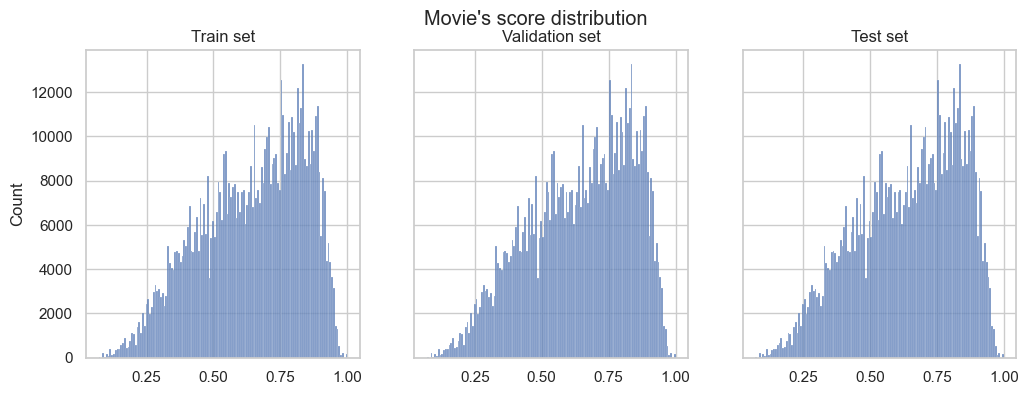

In [54]:
plt.figure(figsize=(12,4))
plt.subplot(131)
g1 = sns.histplot(x=movies_raw_data['train']['my_score'])
g1.set(xlabel=None)
plt.title("Train set")
plt.subplot(132)
g2 = sns.histplot(x=movies_raw_data['val']['my_score'])
g2.set(yticklabels=[])
g2.set(xlabel=None)
g2.set(ylabel=None)
plt.title("Validation set")
plt.subplot(133)
g3 = sns.histplot(x=movies_raw_data['test']['my_score'])
g3.set(yticklabels=[])
g3.set(xlabel=None)
g3.set(ylabel=None)
plt.title("Test set")
plt.suptitle("Movie's score distribution")
plt.show()

## Load to variable

In [ ]:
X_train, X_val, X_test = reviews_raw_data['train']['x'], reviews_raw_data['val']['x'], reviews_raw_data['test']['x']
Y_train, Y_val, Y_test = reviews_raw_data['train']['y'], reviews_raw_data['val']['y'], reviews_raw_data['test']['y']